# Number of Agents
Metrics varying according to the number of D2D pairs.

In [16]:
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sys_simulator.general import load_with_pickle, sns_confidence_interval_plot
from copy import deepcopy
import os

In [17]:
EXP_NAME = 'num_agents'

# ddpg
# ALGO_NAME = 'ddpg'
filepath = "/home/lucas/dev/sys-simulator-2/data/ddpg/evaluate3/20210515-113137/log.pickle"
ddpg_data = load_with_pickle(filepath)
# dql
# ALGO_NAME = 'dql'
filepath = "/home/lucas/dev/sys-simulator-2/data/dql/evaluate3/20210516-125837/log.pickle"
dql_data = load_with_pickle(filepath)
# a2c
# ALGO_NAME = 'a2c'
filepath = "/home/lucas/dev/sys-simulator-2/data/a2c/evaluate3/20210511-220757/log.pickle"
a2c_data = load_with_pickle(filepath)
# discrete random
filepath = "/home/lucas/dev/sys-simulator-2/data/benchmark/script5/20210515-175042/log.pickle"
discrete_data = load_with_pickle(filepath)
# continuous random
filepath = "/home/lucas/dev/sys-simulator-2/data/benchmark/script6/20210516-120730/log.pickle"
continuous_data = load_with_pickle(filepath)
# output path
OUTPUT_PATH = f'/home/lucas/dev/sys-simulator-2/figs/{EXP_NAME}'

# Aux functions

In [18]:
def unpack1(data, key):
    x = []
    y = []
    for ind, i in enumerate(data):
        y.append(i[key])
        x.append((ind+1)*np.ones(len(i[key])))
    x = np.array(x)
    y = np.array(y)
    x = x.reshape(-1)
    y = y.reshape(-1)
    return x, y


def unpack2(data, key):
    y = []
    x = []
    for ind, i in enumerate(data):
        aux_y = np.array(i[key]).reshape(-1)
        aux_x = np.ones(len(aux_y)) * (ind+1)
        y += aux_y.tolist()
        x += aux_x.tolist()    
    return x, y

# Fonts config

In [19]:
x_font = {
    'family': 'serif',
    'color':  'black',
    'weight': 'normal',
    'size': 16,
}
y_font = {
    'family': 'serif',
    'color':  'black',
    'weight': 'normal',
    'size': 16,
}
ticks_font = {
    'fontfamily': 'serif',
    'fontsize': 13
}
legends_font = {
    'size': 13,
    'family': 'serif'
}

# MUE SINR

In [20]:
ddpg_data[0].keys()

dict_keys(['rewards', 'mue_sinrs', 'd2d_sinrs', 'mue_availability'])

/home/lucas/dev/sys-simulator-2/figs/num_agents/mue-sinrs-algos.svg


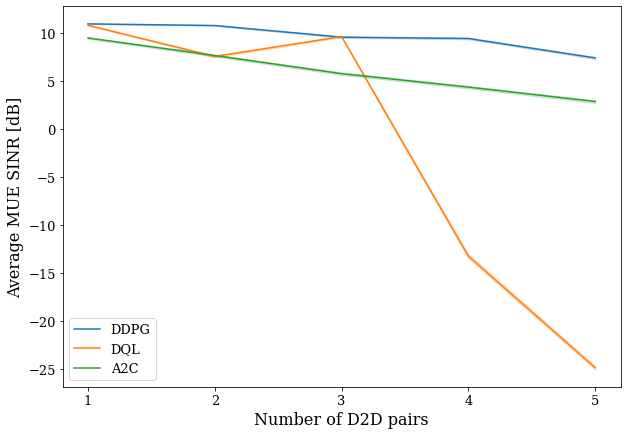

In [21]:
# data
key = 'mue_sinrs'
x, y_ddpg = unpack1(ddpg_data, key)
_, y_dql = unpack1(dql_data, key)
_, y_a2c = unpack1(a2c_data, key)
# _, y_discrete_data = unpack1(discrete_data, key)
# _, y_continuous_data = unpack1(continuous_data, key)
# setup
plt.figure(figsize=(10,7))
plt.xlabel('Number of D2D pairs', fontdict=x_font)
plt.ylabel('Average MUE SINR [dB]', fontdict=y_font)
plt.xticks([1, 2, 3, 4, 5], **ticks_font)
plt.yticks(**ticks_font)
# plot
sns.lineplot(x=x, y=y_ddpg, label='DDPG')
sns.lineplot(x=x, y=y_dql, label='DQL')
sns.lineplot(x=x, y=y_a2c, label='A2C')
# sns.lineplot(x=x, y=y_discrete_data, label='Discrete random')
# sns.lineplot(x=x, y=y_continuous_data, label='Continuous random')
plt.legend(prop=legends_font)
# save fig
fig_name = 'mue-sinrs-algos'
svg_path = f'{OUTPUT_PATH}/{fig_name}.svg'
eps_path = f'{OUTPUT_PATH}/{fig_name}.eps'
plt.savefig(svg_path)
os.system(f'magick convert {svg_path} {eps_path}')
print(svg_path)
plt.show()

# MUE availability

/home/lucas/dev/sys-simulator-2/figs/num_agents/mue-availability-algos.svg


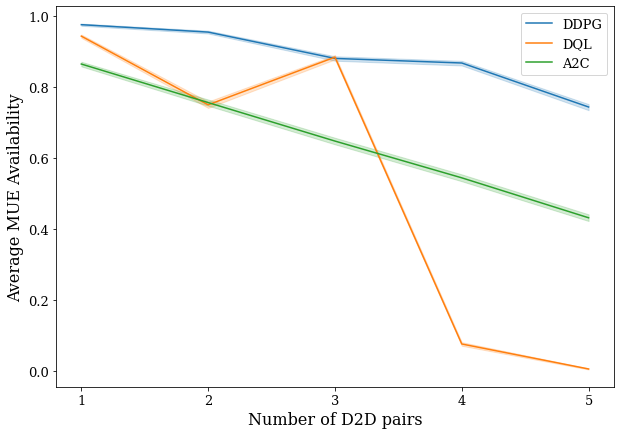

In [22]:
# data
key = 'mue_availability'
x, y_ddpg = unpack1(ddpg_data, key)
_, y_dql = unpack1(dql_data, key)
_, y_a2c = unpack1(a2c_data, key)
# _, y_discrete_data = unpack1(discrete_data, key)
# _, y_continuous_data = unpack1(continuous_data, key)
# setup
plt.figure(figsize=(10,7))
plt.xlabel('Number of D2D pairs', fontdict=x_font)
plt.ylabel('Average MUE Availability', fontdict=y_font)
plt.xticks([1, 2, 3, 4, 5], **ticks_font)
plt.yticks(**ticks_font)
# plot
sns.lineplot(x=x, y=y_ddpg, label='DDPG')
sns.lineplot(x=x, y=y_dql, label='DQL')
sns.lineplot(x=x, y=y_a2c, label='A2C')
# sns.lineplot(x=x, y=y_discrete_data, label='Discrete random')
# sns.lineplot(x=x, y=y_continuous_data, label='Continuous random')
plt.legend(prop=legends_font)
# save fig
fig_name = 'mue-availability-algos'
svg_path = f'{OUTPUT_PATH}/{fig_name}.svg'
eps_path = f'{OUTPUT_PATH}/{fig_name}.eps'
plt.savefig(svg_path)
os.system(f'magick convert {svg_path} {eps_path}')
print(svg_path)
plt.show()

# D2D SINRs

In [23]:
a2c_data[0].keys()

dict_keys(['rewards', 'mue_sinrs', 'd2d_sinrs', 'mue_availability'])

/home/lucas/dev/sys-simulator-2/figs/num_agents/d2d-sinrs-algos.svg


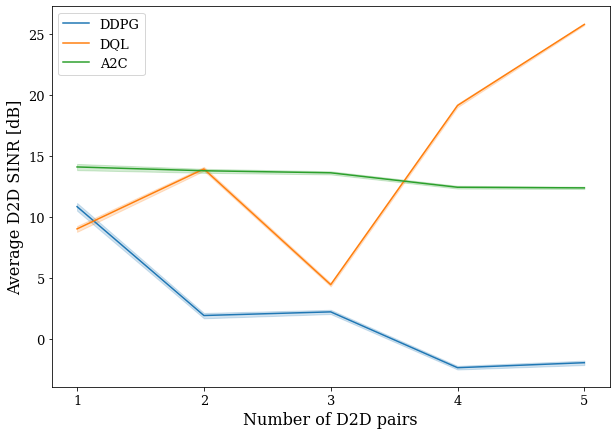

In [24]:
# data
key = 'd2d_sinrs'
x, y_ddpg = unpack2(ddpg_data, key)
_, y_dql = unpack2(dql_data, key)
_, y_a2c = unpack2(a2c_data, key)
# _, y_discrete_data = unpack2(discrete_data, key)
# _, y_continuous_data = unpack2(continuous_data, key)
# setup
plt.figure(figsize=(10,7))
plt.xlabel('Number of D2D pairs', fontdict=x_font)
plt.ylabel('Average D2D SINR [dB]', fontdict=y_font)
plt.xticks([1, 2, 3, 4, 5], **ticks_font)
plt.yticks(**ticks_font)
# plot
sns.lineplot(x=x, y=y_ddpg, label='DDPG')
sns.lineplot(x=x, y=y_dql, label='DQL')
sns.lineplot(x=x, y=y_a2c, label='A2C')
# sns.lineplot(x=x, y=y_discrete_data, label='Discrete random')
# sns.lineplot(x=x, y=y_continuous_data, label='Continuous random')
plt.legend(prop=legends_font)
# save fig
fig_name = 'd2d-sinrs-algos'
svg_path = f'{OUTPUT_PATH}/{fig_name}.svg'
eps_path = f'{OUTPUT_PATH}/{fig_name}.eps'
plt.savefig(svg_path)
os.system(f'magick convert {svg_path} {eps_path}')
print(svg_path)
plt.show()

# Rewards

/home/lucas/dev/sys-simulator-2/figs/num_agents/d2d-rewards-algos.svg


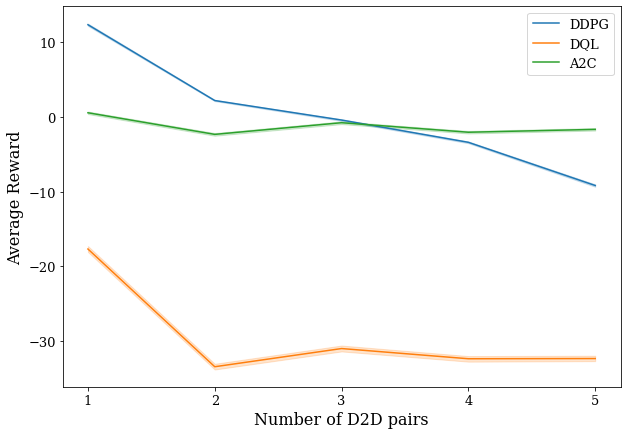

In [25]:
# data
# gambiarra ddpg
key = 'rewards'
x, y_ddpg = unpack1(ddpg_data, key)
y_ddpg = y_ddpg.tolist()
aux = deepcopy(y_ddpg)
y_ddpg += aux
y_ddpg += aux
x = x.tolist()
aux = deepcopy(x)
x += aux
x += aux
_, y_dql = unpack2(dql_data, key)
_, y_a2c = unpack2(a2c_data, key)
# _, y_discrete_data = unpack2(discrete_data, key)
# _, y_continuous_data = unpack2(continuous_data, key)
# setup
plt.figure(figsize=(10,7))
plt.xlabel('Number of D2D pairs', fontdict=x_font)
plt.ylabel('Average Reward', fontdict=y_font)
plt.xticks([1, 2, 3, 4, 5], **ticks_font)
plt.yticks(**ticks_font)
# plot
sns.lineplot(x=x, y=y_ddpg, label='DDPG')
sns.lineplot(x=x, y=y_dql, label='DQL')
sns.lineplot(x=x, y=y_a2c, label='A2C')
# sns.lineplot(x=x, y=y_discrete_data, label='Discrete random')
# sns.lineplot(x=x, y=y_continuous_data, label='Continuous random')
plt.legend(prop=legends_font)
# save fig
fig_name = 'd2d-rewards-algos'
svg_path = f'{OUTPUT_PATH}/{fig_name}.svg'
eps_path = f'{OUTPUT_PATH}/{fig_name}.eps'
plt.savefig(svg_path)
os.system(f'magick convert {svg_path} {eps_path}')
print(svg_path)
plt.show()

# Benchmarks

/home/lucas/dev/sys-simulator-2/figs/num_agents/benchmark-mue-sinrs-algos.svg


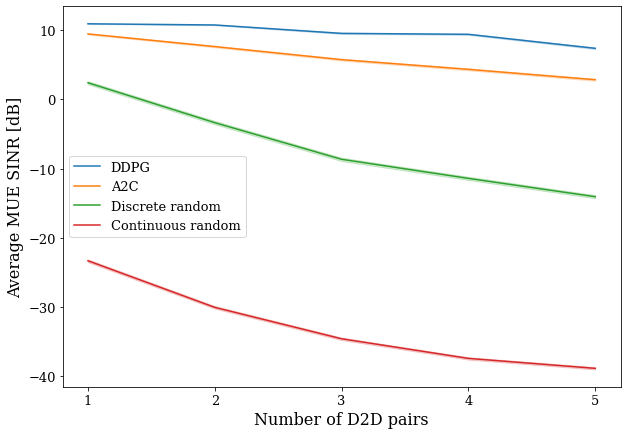

In [26]:
# data
key = 'mue_sinrs'
x, y_ddpg = unpack1(ddpg_data, key)
_, y_dql = unpack1(dql_data, key)
_, y_a2c = unpack1(a2c_data, key)
_, y_discrete_data = unpack1(discrete_data, key)
_, y_continuous_data = unpack1(continuous_data, key)
# setup
plt.figure(figsize=(10,7))
plt.xlabel('Number of D2D pairs', fontdict=x_font)
plt.ylabel('Average MUE SINR [dB]', fontdict=y_font)
plt.xticks([1, 2, 3, 4, 5], **ticks_font)
plt.yticks(**ticks_font)
# plot
sns.lineplot(x=x, y=y_ddpg, label='DDPG')
# sns.lineplot(x=x, y=y_dql, label='DQL')
sns.lineplot(x=x, y=y_a2c, label='A2C')
sns.lineplot(x=x, y=y_discrete_data, label='Discrete random')
sns.lineplot(x=x, y=y_continuous_data, label='Continuous random')
plt.legend(prop=legends_font)
# save fig
fig_name = 'benchmark-mue-sinrs-algos'
svg_path = f'{OUTPUT_PATH}/{fig_name}.svg'
eps_path = f'{OUTPUT_PATH}/{fig_name}.eps'
plt.savefig(svg_path)
os.system(f'magick convert {svg_path} {eps_path}')
print(svg_path)
plt.show()

# MUE availability

/home/lucas/dev/sys-simulator-2/figs/num_agents/benchmark-mue-availability-algos.svg


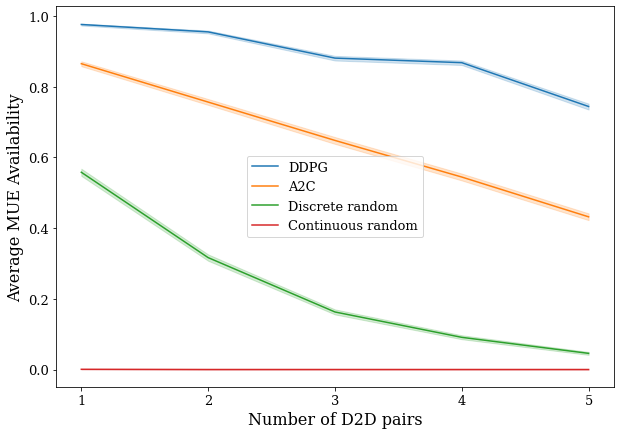

In [27]:
# data
key = 'mue_availability'
x, y_ddpg = unpack1(ddpg_data, key)
_, y_dql = unpack1(dql_data, key)
_, y_a2c = unpack1(a2c_data, key)
_, y_discrete_data = unpack1(discrete_data, key)
_, y_continuous_data = unpack1(continuous_data, key)
# setup
plt.figure(figsize=(10,7))
plt.xlabel('Number of D2D pairs', fontdict=x_font)
plt.ylabel('Average MUE Availability', fontdict=y_font)
plt.xticks([1, 2, 3, 4, 5], **ticks_font)
plt.yticks(**ticks_font)
# plot
sns.lineplot(x=x, y=y_ddpg, label='DDPG')
# sns.lineplot(x=x, y=y_dql, label='DQL')
sns.lineplot(x=x, y=y_a2c, label='A2C')
sns.lineplot(x=x, y=y_discrete_data, label='Discrete random')
sns.lineplot(x=x, y=y_continuous_data, label='Continuous random')
plt.legend(prop=legends_font)
# save fig
fig_name = 'benchmark-mue-availability-algos'
svg_path = f'{OUTPUT_PATH}/{fig_name}.svg'
eps_path = f'{OUTPUT_PATH}/{fig_name}.eps'
plt.savefig(svg_path)
os.system(f'magick convert {svg_path} {eps_path}')
print(svg_path)
plt.show()

# D2D SINRs

In [28]:
a2c_data[0].keys()

dict_keys(['rewards', 'mue_sinrs', 'd2d_sinrs', 'mue_availability'])

/home/lucas/dev/sys-simulator-2/figs/num_agents/benchmark-d2d-sinrs-algos.svg


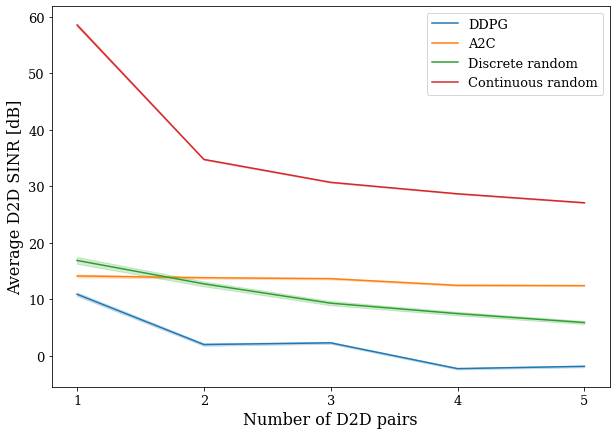

In [29]:
# data
key = 'd2d_sinrs'
x, y_ddpg = unpack2(ddpg_data, key)
_, y_dql = unpack2(dql_data, key)
_, y_a2c = unpack2(a2c_data, key)
_, y_discrete_data = unpack2(discrete_data, key)
_, y_continuous_data = unpack2(continuous_data, key)
# setup
plt.figure(figsize=(10,7))
plt.xlabel('Number of D2D pairs', fontdict=x_font)
plt.ylabel('Average D2D SINR [dB]', fontdict=y_font)
plt.xticks([1, 2, 3, 4, 5], **ticks_font)
plt.yticks(**ticks_font)
# plot
sns.lineplot(x=x, y=y_ddpg, label='DDPG')
# sns.lineplot(x=x, y=y_dql, label='DQL')
sns.lineplot(x=x, y=y_a2c, label='A2C')
sns.lineplot(x=x, y=y_discrete_data, label='Discrete random')
sns.lineplot(x=x, y=y_continuous_data, label='Continuous random')
plt.legend(prop=legends_font)
# save fig
fig_name = 'benchmark-d2d-sinrs-algos'
svg_path = f'{OUTPUT_PATH}/{fig_name}.svg'
eps_path = f'{OUTPUT_PATH}/{fig_name}.eps'
plt.savefig(svg_path)
os.system(f'magick convert {svg_path} {eps_path}')
print(svg_path)
plt.show()

# Rewards

/home/lucas/dev/sys-simulator-2/figs/num_agents/benchmark-d2d-rewards-algos.svg


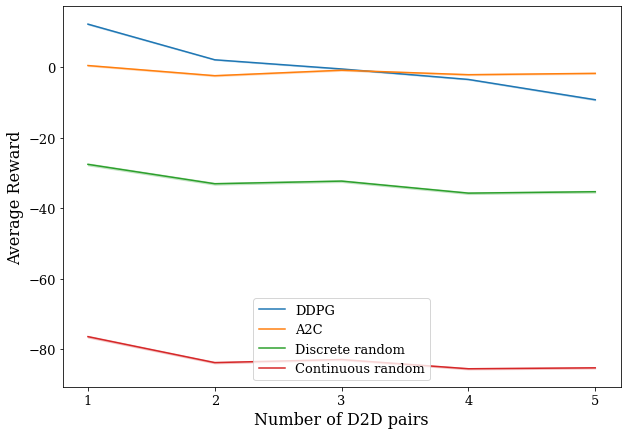

In [30]:
# data
# gambiarra ddpg
key = 'rewards'
x, y_ddpg = unpack1(ddpg_data, key)
y_ddpg = y_ddpg.tolist()
aux = deepcopy(y_ddpg)
y_ddpg += aux
y_ddpg += aux
x = x.tolist()
aux = deepcopy(x)
x += aux
x += aux
_, y_dql = unpack2(dql_data, key)
_, y_a2c = unpack2(a2c_data, key)
_, y_discrete_data = unpack2(discrete_data, key)
_, y_continuous_data = unpack2(continuous_data, key)
# setup
plt.figure(figsize=(10,7))
plt.xlabel('Number of D2D pairs', fontdict=x_font)
plt.ylabel('Average Reward', fontdict=y_font)
plt.xticks([1, 2, 3, 4, 5], **ticks_font)
plt.yticks(**ticks_font)
# plot
sns.lineplot(x=x, y=y_ddpg, label='DDPG')
# sns.lineplot(x=x, y=y_dql, label='DQL')
sns.lineplot(x=x, y=y_a2c, label='A2C')
sns.lineplot(x=x, y=y_discrete_data, label='Discrete random')
sns.lineplot(x=x, y=y_continuous_data, label='Continuous random')
plt.legend(prop=legends_font)
# save fig
fig_name = 'benchmark-d2d-rewards-algos'
svg_path = f'{OUTPUT_PATH}/{fig_name}.svg'
eps_path = f'{OUTPUT_PATH}/{fig_name}.eps'
plt.savefig(svg_path)
os.system(f'magick convert {svg_path} {eps_path}')
print(svg_path)
plt.show()